In [1]:
import pandas as pd
import numpy as np
import pickle
import warnings
import seaborn as sns
import scipy.stats as stats
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 500)

In [2]:
d_league = {"English Premier League":
            {'id':17,
             'season':{
                 "22-23":41886
             }},
             "German Bundesliga":
            {'id':35,
             'season':{
                 "22-23":42268
             }},
             "Spanish La Liga":
            {'id':8,
             'season':{
                 "22-23":42409
             }},
             "Italian Serie A":
            {'id':23,
             'season':{
                 "22-23":42415
             }},
             "French Ligue 1":
            {'id':34,
             'season':{
                 "22-23":42273
             }}}

In [3]:
l_match_stats = []
l_player_stats = []

for league, item in d_league.items():
  print(league)
  for season, season_id in item['season'].items():
    if season == "22-23":
        with open('top 5 league data 22-23\{}-{} matches dict no heatmap.pickle'.format(league, season), 'rb') as handle:
            d_matches = pickle.load(handle)


        for id, info in d_matches.items():
            if 'statistics' in info.keys() and info['info']['status']['code'] != 70 :
                d_home_stats = {}
                d_away_stats = {}

                d_home_stats['league'] = league
                d_home_stats['season'] = season
                d_home_stats['round'] = info['info']['roundInfo']['round']
                d_home_stats['matchId'] = id
                d_home_stats['teamId'] = info['info']['homeTeam']['id']
                d_home_stats['teamName'] = info['info']['homeTeam']['shortName']
                d_home_stats['teamLongName'] = info['info']['homeTeam']['name']
                d_home_stats['formation'] = info['lineups']['home']['formation']
                d_home_stats['isHome'] = True
                d_home_stats['opponentId'] = info['info']['awayTeam']['id']

                d_away_stats['league'] = league
                d_away_stats['season'] = season
                d_away_stats['round'] = info['info']['roundInfo']['round']
                d_away_stats['matchId'] = id
                d_away_stats['teamId'] = info['info']['awayTeam']['id']
                d_away_stats['teamName'] = info['info']['awayTeam']['shortName']
                d_away_stats['teamLongName'] = info['info']['awayTeam']['name']
                d_away_stats['formation'] = info['lineups']['away']['formation']
                d_away_stats['isHome'] = False
                d_away_stats['opponentId'] = info['info']['homeTeam']['id']

                try:
                    d_home_stats['score'] = info['info']['homeScore']['display']
                    d_away_stats['score'] = info['info']['awayScore']['display']
                except:
                    print(id)
                    break

                for group in info['statistics']['statistics'][0]['groups']:
                    for item in group['statisticsItems']:
                        d_home_stats[item['name']] = item['homeValue']
                        d_away_stats[item['name']] = item['awayValue']

                        if 'homeTotal' in item.keys() and 'awayTotal' in item.keys():
                            d_home_stats["{} Total".format(item['name'])] = item['homeTotal']
                            d_away_stats["{} Total".format(item['name'])] = item['awayTotal']

                l_match_stats.append(d_home_stats)
                l_match_stats.append(d_away_stats)

        for id, info in d_matches.items():
            if 'lineups' in info.keys() and info['info']['status']['code'] != 70:

                for situation in ['home', 'away']:
                    for player in info['lineups'][situation]['players']:
                        if 'statistics' in player.keys():
                            d_player_stats = {}

                            d_player_stats['matchId'] = id
                            d_player_stats['teamId'] = info['info']['{}Team'.format(situation)]['id']
                            d_player_stats['teamName'] = info['info']['{}Team'.format(situation)]['shortName']
                            d_player_stats['isHome'] = situation == 'home'
                            d_player_stats['playerId'] = player['player']['id']
                            d_player_stats['playerFullName'] = player['player']['name']
                            d_player_stats['playerName'] = player['player']['shortName']
                            d_player_stats['position'] = player['position']

                            # try:
                            #   d_player_stats['position'] = player['position']
                            # except:
                            #   print("Match Id: {}\nPlayer Id: {} ({} player)".format(id, player['player']['id'], situation))
                            #   break

                            d_player_stats['substitute'] = player['substitute']

                            for metric, value in player['statistics'].items():
                                if metric != 'ratingVersions':
                                    d_player_stats[metric] = value

                            l_player_stats.append(d_player_stats)

English Premier League
German Bundesliga
Spanish La Liga
Italian Serie A
French Ligue 1


In [4]:
df_player_stats = pd.DataFrame(l_player_stats)

df_player_stats.head(10)

,matchId,teamId,teamName,isHome,playerId,playerFullName,playerName,position,substitute,totalPass,accuratePass,totalLongBalls,aerialWon,duelWon,totalClearance,errorLeadToAGoal,goodHighClaim,punches,totalKeeperSweeper,accurateKeeperSweeper,minutesPlayed,touches,rating,possessionLostCtrl,expectedGoals,goalsPrevented,totalCross,accurateCross,totalContest,wonContest,outfielderBlock,interceptionWon,totalTackle,wasFouled,keyPass,expectedAssists,accurateLongBalls,aerialLost,duelLost,fouls,dispossessed,challengeLost,bigChanceCreated,blockedScoringAttempt,shotOffTarget,onTargetScoringAttempt,totalOffside,bigChanceMissed,goals,goalAssist,savedShotsFromInsideTheBox,saves,hitWoodwork,errorLeadToAShot,clearanceOffLine,lastManTackle,ownGoals,penaltyWon,penaltyConceded,penaltyMiss,penaltySave
0,10385697,38,Chelsea,True,845074,Edouard Mendy,E. Mendy,G,False,16.0,15.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,90.0,23.0,5.5,1.0,0.0000,-1.7834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10385697,38,Chelsea,True,826134,Trevoh Chalobah,T. Chalobah,D,False,101.0,85.0,2.0,1.0,7.0,4.0,NaN,NaN,NaN,NaN,NaN,90.0,127.0,7.4,18.0,0.0000,NaN,2.0,1.0,3.0,3.0,1.0,1.0,2.0,1.0,2.0,0.040353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10385697,38,Chelsea,True,33541,Thiago Silva,T. Silva,D,False,104.0,98.0,4.0,4.0,6.0,3.0,NaN,NaN,NaN,NaN,NaN,90.0,112.0,6.8,7.0,0.0000,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,1.0,0.165143,2.0,2.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10385697,38,Chelsea,True,904827,Benoît Badiashile,B. Badiashile,D,False,97.0,90.0,10.0,4.0,6.0,3.0,NaN,NaN,NaN,NaN,NaN,90.0,111.0,6.7,11.0,0.0000,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,0.010678,5.0,1.0,3.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10385697,38,Chelsea,True,1136730,Lewis Hall,L. Hall,D,False,62.0,57.0,6.0,1.0,4.0,1.0,NaN,NaN,NaN,NaN,NaN,90.0,88.0,6.9,10.0,0.0639,NaN,4.0,2.0,1.0,1.0,NaN,NaN,1.0,1.0,3.0,0.136767,5.0,2.0,5.0,NaN,1.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,10385697,38,Chelsea,True,136710,Mateo Kovačić,M. Kovačić,M,False,27.0,23.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,45.0,29.0,6.4,5.0,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.030811,1.0,NaN,3.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10385697,38,Chelsea,True,974505,Enzo Fernández,E. Fernández,M,False,109.0,97.0,18.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,90.0,116.0,7.4,15.0,0.0499,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,0.428394,14.0,2.0,4.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,10385697,38,Chelsea,True,904970,Conor Gallagher,C. Gallagher,M,False,54.0,46.0,1.0,NaN,6.0,1.0,NaN,NaN,NaN,NaN,NaN,90.0,71.0,6.6,15.0,0.1409,NaN,1.0,NaN,4.0,2.0,NaN,NaN,1.0,3.0,NaN,0.044986,1.0,1.0,10.0,4.0,2.0,1.0,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,10385697,38,Chelsea,True,966547,Noni Madueke,N. Madueke,F,False,27.0,23.0,NaN,1.0,9.0,2.0,NaN,NaN,NaN,NaN,NaN,73.0,52.0,6.5,13.0,0.0000,NaN,NaN,NaN,7.0,3.0,NaN,NaN,3.0,2.0,NaN,0.063806,NaN,NaN,10.0,2.0,3.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10385697,38,Chelsea,True,851671,João Félix,J. Félix,F,False,21.0,18.0,2.0,NaN,3.0,1.0,NaN,NaN,NaN,NaN,NaN,73.0,35.0,6.4,8.0,0.2950,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,3.0,NaN,0.012373,NaN,2.0,3.0,2.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_match_stats = pd.DataFrame(l_match_stats)
df_match_stats.head(10)

,league,season,round,matchId,teamId,teamName,teamLongName,formation,isHome,opponentId,score,Expected goals,Ball possession,Total shots,Shots on target,Shots off target,Blocked shots,Corner kicks,Offsides,Fouls,Yellow cards,Free kicks,Throw-ins,Goal kicks,Big chances,Big chances missed,Shots inside box,Shots outside box,Goalkeeper saves,Goals prevented,Passes,Accurate passes,Long balls,Long balls Total,Crosses,Crosses Total,Dribbles,Dribbles Total,Possession lost,Duels won,Aerials won,Tackles,Interceptions,Clearances,Hit woodwork,Counter attacks,Counter attack shots,Counter attack goals,Red cards
0,English Premier League,22-23,36,10385697,38,Chelsea,Chelsea,4-3-3,True,14,2,1.17,76,14,6,3,5,2,1.0,13,3.0,15,27,7,2.0,1.0,8,6,0.0,-1.78,708,631,28,45,4,17,15,27,137,60,16,14,3,17,NaN,NaN,NaN,NaN,NaN
1,English Premier League,22-23,36,10385697,14,Forest,Nottingham Forest,3-4-2-1,False,38,2,1.30,24,11,2,7,2,5,2.0,15,1.0,11,18,5,3.0,1.0,10,1,4.0,-0.34,217,132,11,52,4,11,5,14,124,56,13,28,17,25,NaN,NaN,NaN,NaN,NaN
2,English Premier League,22-23,36,10385702,35,Man Utd,Manchester United,4-2-3-1,True,3,2,3.20,48,27,9,11,7,11,0.0,9,3.0,9,19,7,4.0,2.0,13,14,0.0,0.00,439,359,17,47,3,15,13,18,119,51,16,13,8,23,1.0,3.0,2.0,1.0,NaN
3,English Premier League,22-23,36,10385702,3,Wolves,Wolverhampton,4-4-2,False,35,0,0.33,52,5,0,5,0,7,1.0,9,2.0,9,21,13,0.0,0.0,5,0,8.0,0.48,469,377,36,67,7,22,16,21,136,47,14,8,7,15,0.0,0.0,0.0,0.0,NaN
4,English Premier League,22-23,36,10385688,50,Brentford,Brentford,4-3-3,True,37,2,3.70,53,24,10,9,5,7,3.0,5,1.0,3,21,4,6.0,4.0,18,6,4.0,0.49,506,411,28,64,8,22,12,17,142,53,18,20,5,15,0.0,1.0,1.0,NaN,NaN
5,English Premier League,22-23,36,10385688,37,West Ham,West Ham United,4-2-3-1,False,50,0,0.23,47,4,4,0,0,5,3.0,5,0.0,5,18,12,0.0,0.0,3,1,7.0,1.55,447,353,19,49,1,18,6,16,151,41,19,11,8,26,1.0,0.0,0.0,NaN,NaN
6,English Premier League,22-23,36,10385685,48,Everton,Everton,4-2-3-1,True,17,0,1.78,37,7,3,3,1,8,1.0,12,1.0,4,13,9,1.0,1.0,6,1,1.0,-1.79,381,324,19,43,6,20,9,13,91,37,8,16,11,15,1.0,0.0,0.0,NaN,NaN
7,English Premier League,22-23,36,10385685,17,Man City,Manchester City,4-2-3-1,False,48,3,0.76,63,9,4,3,2,6,0.0,4,0.0,10,13,5,1.0,0.0,3,6,2.0,0.51,670,610,35,56,3,17,8,14,96,33,8,7,5,21,0.0,1.0,1.0,NaN,NaN
8,English Premier League,22-23,36,10385684,42,Arsenal,Arsenal,4-3-3,True,30,0,0.92,41,14,2,8,4,5,1.0,13,1.0,16,11,5,1.0,1.0,11,3,3.0,-1.09,360,276,14,43,2,11,8,12,120,51,8,20,7,6,1.0,NaN,NaN,NaN,NaN
9,English Premier League,22-23,36,10385684,30,Brighton,Brighton & Hove Albion,4-2-3-1,False,42,3,1.72,59,12,6,5,1,2,4.0,17,2.0,13,15,9,4.0,1.0,7,5,2.0,0.24,535,446,22,49,0,5,13,25,129,52,11,15,8,13,0.0,NaN,NaN,NaN,NaN


In [6]:
print("PLAYER STATS")
print(df_player_stats.columns)

PLAYER STATS
Index(['matchId', 'teamId', 'teamName', 'isHome', 'playerId', 'playerFullName',
       'playerName', 'position', 'substitute', 'totalPass', 'accuratePass',
       'totalLongBalls', 'aerialWon', 'duelWon', 'totalClearance',
       'errorLeadToAGoal', 'goodHighClaim', 'punches', 'totalKeeperSweeper',
       'accurateKeeperSweeper', 'minutesPlayed', 'touches', 'rating',
       'possessionLostCtrl', 'expectedGoals', 'goalsPrevented', 'totalCross',
       'accurateCross', 'totalContest', 'wonContest', 'outfielderBlock',
       'interceptionWon', 'totalTackle', 'wasFouled', 'keyPass',
       'expectedAssists', 'accurateLongBalls', 'aerialLost', 'duelLost',
       'fouls', 'dispossessed', 'challengeLost', 'bigChanceCreated',
       'blockedScoringAttempt', 'shotOffTarget', 'onTargetScoringAttempt',
       'totalOffside', 'bigChanceMissed', 'goals', 'goalAssist',
       'savedShotsFromInsideTheBox', 'saves', 'hitWoodwork',
       'errorLeadToAShot', 'clearanceOffLine', 'lastManTac

In [7]:
print("TEAM STATS")
print(df_match_stats.columns)

TEAM STATS
Index(['league', 'season', 'round', 'matchId', 'teamId', 'teamName',
       'teamLongName', 'formation', 'isHome', 'opponentId', 'score',
       'Expected goals', 'Ball possession', 'Total shots', 'Shots on target',
       'Shots off target', 'Blocked shots', 'Corner kicks', 'Offsides',
       'Fouls', 'Yellow cards', 'Free kicks', 'Throw-ins', 'Goal kicks',
       'Big chances', 'Big chances missed', 'Shots inside box',
       'Shots outside box', 'Goalkeeper saves', 'Goals prevented', 'Passes',
       'Accurate passes', 'Long balls', 'Long balls Total', 'Crosses',
       'Crosses Total', 'Dribbles', 'Dribbles Total', 'Possession lost',
       'Duels won', 'Aerials won', 'Tackles', 'Interceptions', 'Clearances',
       'Hit woodwork', 'Counter attacks', 'Counter attack shots',
       'Counter attack goals', 'Red cards'],
      dtype='object')


## Style Definitions
1. Directness -> Number of shots/500 touches
2. Shot Distance -> Number of outside box shots/Number of shots
3. Dribbles -> Number of dribbles attempted/500 touches
4. Crosses -> Number of crosses attempted/500 passes attempted
5. Long Balls -> Number of long balls attempted/500 passes attempted
6. High Press -> Number of opponent GK+DF passes/Number of FW+MF defensive actions (tackles+interceptions+fouls)
7. Offside Trap -> Number of opponent offside/500 opponent passes attempted
8. Defender Activity -> Number of FW+MF defensive actions (tackles+interceptions+clearances+fouls)/500 opponent FW+MF touches
9. Discipline -> Number of fouls/Number of defensive actions
10. Counter Attack -> Number of counter attacks/500 opponent touches

In [8]:
# touches
df_touches = df_player_stats.groupby(['matchId','teamId'],as_index=False).agg({'touches':'sum',
                                                                               'totalTackle':'sum',
                                                                                'interceptionWon':'sum',
                                                                                'fouls':'sum',
                                                                                'totalClearance':'sum',
                                                                                'outfielderBlock':'sum',
                                                                                'dispossessed':'sum'})
df_touches = df_touches.loc[df_touches['touches']>0].reset_index(drop=True)
df_touches['defensiveActions'] = df_touches['totalTackle']+df_touches['interceptionWon']+df_touches['fouls']+df_touches['totalClearance']+df_touches['outfielderBlock']
df_match_stats = pd.merge(df_match_stats, df_touches)

# position based touches/passes
df_def_passes = df_player_stats.loc[(df_player_stats['position']=='D') | (df_player_stats['position']=='G')].groupby(['matchId','teamId'],as_index=False).agg({'totalPass':'sum'})
df_def_da = df_player_stats.loc[(df_player_stats['position']=='D') | (df_player_stats['position']=='G')].groupby(['matchId','teamId'],as_index=False).agg({'totalTackle':'sum',
                                                                                                                                                           'interceptionWon':'sum',
                                                                                                                                                           'fouls':'sum',
                                                                                                                                                           'totalClearance':'sum',
                                                                                                                                                           'outfielderBlock':'sum'})
df_for_da = df_player_stats.loc[(df_player_stats['position']=='F') | (df_player_stats['position']=='M')].groupby(['matchId','teamId'],as_index=False).agg({'totalTackle':'sum',
                                                                                                                                                           'interceptionWon':'sum',
                                                                                                                                                           'fouls':'sum'})
df_for_touches = df_player_stats.loc[(df_player_stats['position']=='F') | (df_player_stats['position']=='M')].groupby(['matchId','teamId'],as_index=False).agg({'touches':'sum'})
df_def_da['defensiveActions'] = df_def_da['totalTackle']+df_def_da['interceptionWon']+df_def_da['fouls']+df_def_da['totalClearance']+df_def_da['outfielderBlock']
df_for_da['defensiveActions'] = df_for_da['totalTackle']+df_for_da['interceptionWon']+df_for_da['fouls']

df_match_stats = pd.merge(df_match_stats, df_def_passes.rename({'totalPass':'defPasses'},axis=1))
df_match_stats = pd.merge(df_match_stats, df_def_da[['matchId','teamId','defensiveActions']].rename({'defensiveActions':'defenderDA'},axis=1))
df_match_stats = pd.merge(df_match_stats, df_for_da[['matchId','teamId','defensiveActions']].rename({'defensiveActions':'forwardDA'},axis=1))
df_match_stats = pd.merge(df_match_stats, df_for_touches[['matchId','teamId','touches']].rename({'touches':'forwardTouches'},axis=1))

df_opp_touches = df_match_stats[['matchId','teamId','touches',
                                 'Offsides', 'defPasses', 'Passes',
                                 'forwardTouches', 'Expected goals']].rename({'teamId':'opponentId',
                                                                             'touches':'opponentTouches',
                                                                             'Offsides':'opponentOffsides',
                                                                             'defPasses':'opponentDefPasses',
                                                                             'Passes':'opponentPasses',
                                                                             'forwardTouches':'opponentForwardTouches',
                                                                             'Expected goals':'xgAllowed'}, axis=1)
df_match_stats = pd.merge(df_match_stats, df_opp_touches)

In [9]:
info_cols = ['league', 'season', 'matchId','teamId','teamName', 'teamLongName','isHome']
df_style = df_match_stats[info_cols]

# possesion
df_style['directness'] = df_match_stats['Total shots']/df_match_stats['touches']*500
df_style['shot'] = df_match_stats['Shots outside box']/df_match_stats['Total shots']
df_style['dribbles'] = df_match_stats['Dribbles Total']/df_match_stats['touches']*500
df_style['crosses'] = df_match_stats['Crosses Total']/df_match_stats['Passes']*500
df_style['long balls'] = df_match_stats['Long balls Total']/df_match_stats['Passes']*500

# out of possesion
df_style['high press'] = df_match_stats['opponentDefPasses']/df_match_stats['forwardDA']
df_style['offside trap'] = df_match_stats['opponentOffsides']/df_match_stats['opponentPasses']*500
df_style['intensity'] = df_match_stats['defenderDA']/df_match_stats['opponentForwardTouches']*500
df_style['fouls'] = df_match_stats['Fouls']/df_match_stats['defensiveActions']
df_style['counter'] = df_match_stats['Counter attacks']/df_match_stats['opponentTouches']*500

# performance
df_style['chance creation'] = df_match_stats['Expected goals']
df_style['chance prevention'] = df_match_stats['xgAllowed']
df_style['finishing'] = df_match_stats['score']-df_match_stats['Expected goals']
df_style['sloppy'] = df_match_stats['dispossessed']/df_match_stats['touches']*500

In [10]:
df_style.isna().sum()

league                  0
season                  0
matchId                 0
teamId                  0
teamName                0
teamLongName            0
isHome                  0
directness              0
shot                    0
dribbles                0
crosses                 0
long balls              0
high press              0
offside trap          146
intensity               0
fouls                   0
counter              1480
chance creation         8
chance prevention       8
finishing               8
sloppy                  0
dtype: int64

In [11]:
df_style = df_style.loc[df_style['chance creation'].notna()]
df_style = df_style.fillna(0)

In [12]:
style_cols = ['directness', 'shot',
       'dribbles', 'crosses', 'long balls', 'high press', 'offside trap',
       'intensity', 'fouls', 'counter']
perf_cols = ['chance creation', 'finishing',
       'chance prevention', 'sloppy']

standards = {}
for style_col in style_cols+perf_cols:
    standards[style_col] = {}
    standards[style_col]['mean'] = df_style[style_col].mean()
    standards[style_col]['std'] = df_style[style_col].std()

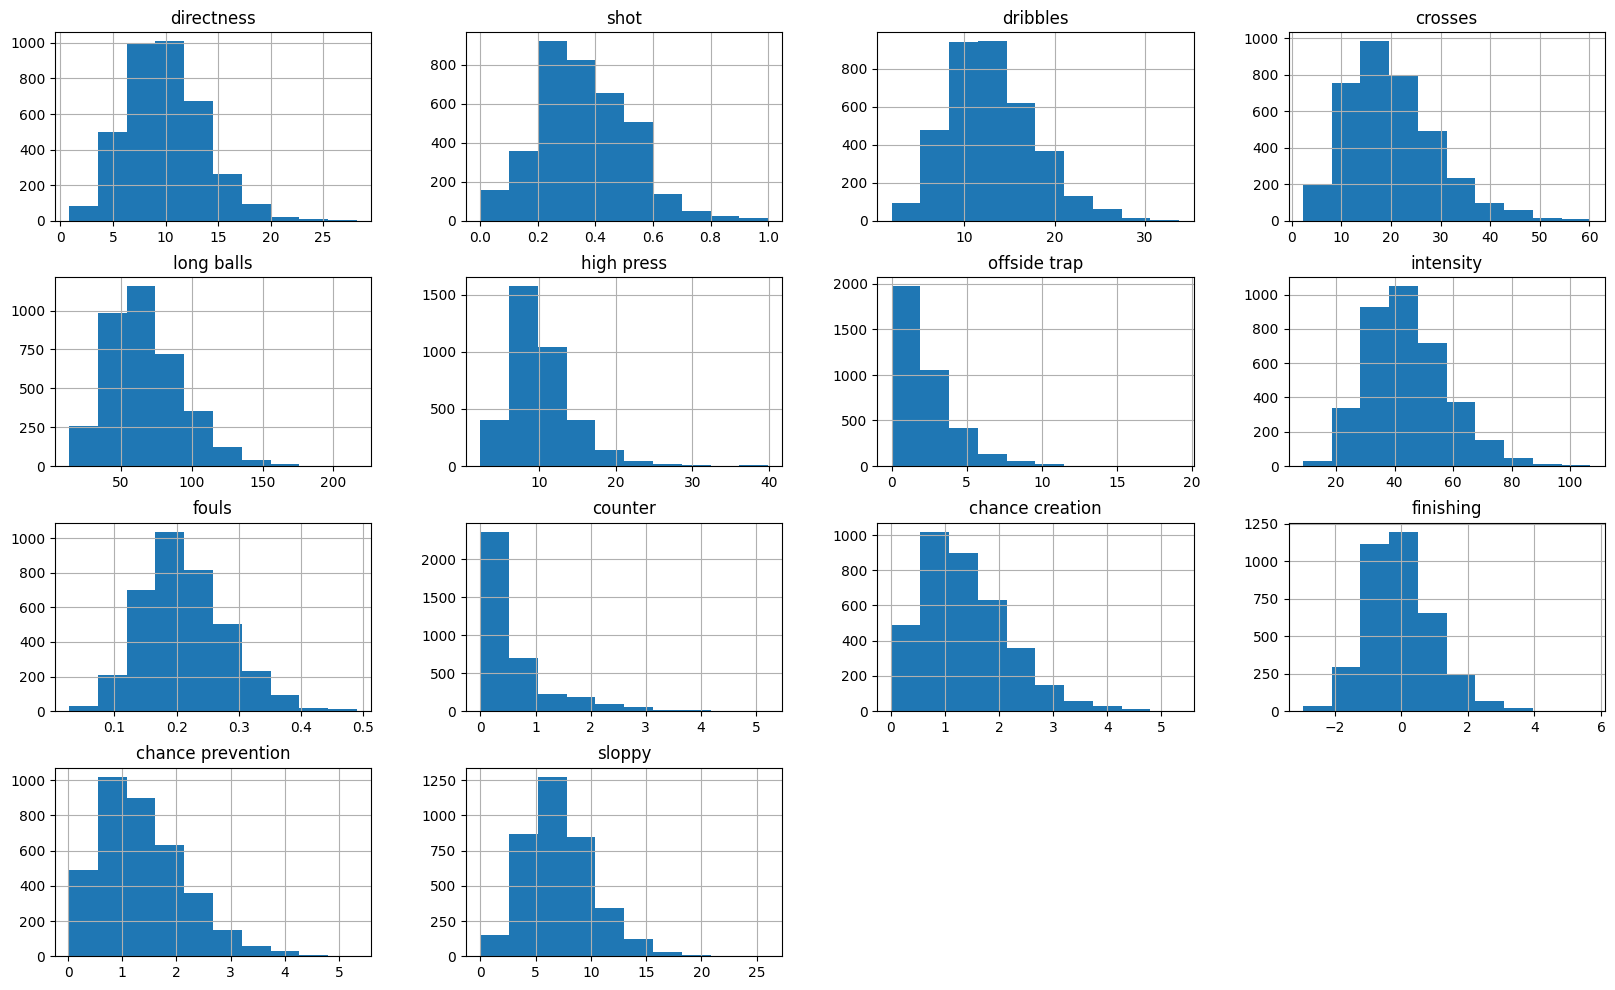

In [13]:
import matplotlib.pyplot as plt
df_style[style_cols+perf_cols].hist(figsize=(20,12))
plt.show()

In [14]:
df_style[style_cols].describe()

,directness,shot,dribbles,crosses,long balls,high press,offside trap,intensity,fouls,counter
count,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000
mean,9.931815,0.353870,13.016807,20.180050,66.932072,10.258015,2.184957,44.397537,0.212538,0.459972
std,3.655177,0.162060,4.751882,9.056609,25.804524,4.223823,2.071548,13.535114,0.067943,0.765854
min,0.837521,0.000000,1.960784,2.257336,13.280212,2.282051,0.000000,8.670520,0.027397,0.000000
25%,7.312958,0.250000,9.565217,13.498318,47.890492,7.375000,0.883392,34.667883,0.163934,0.000000
50%,9.615385,0.333333,12.523223,19.006891,63.093287,9.411765,1.697793,43.170478,0.205681,0.000000
75%,12.237049,0.454545,15.900358,25.397381,82.511761,12.180481,3.095177,52.631579,0.254545,0.787402
max,28.195489,1.000000,33.811475,60.224090,216.560510,39.909091,19.148936,106.965174,0.489362,5.219207


In [15]:
df_style[perf_cols].describe()

,chance creation,finishing,chance prevention,sloppy
count,3650.000000,3650.000000,3650.000000,3650.000000
mean,1.386112,-0.002825,1.386112,7.137657
std,0.792182,1.014999,0.792182,3.075179
min,0.020000,-2.950000,0.020000,0.000000
25%,0.790000,-0.690000,0.790000,4.937576
50%,1.250000,-0.110000,1.250000,6.796850
75%,1.840000,0.580000,1.840000,8.886612
max,5.330000,5.680000,5.330000,26.041667


In [16]:
df_z = df_style.copy()

for style_col in style_cols+perf_cols:
    df_z[style_col] = (df_z[style_col]-standards[style_col]['mean'])/standards[style_col]['std']

In [17]:
standards

{'directness': {'mean': 9.93181498357039, 'std': 3.655177017423077},
 'shot': {'mean': 0.3538704227649129, 'std': 0.1620603389372018},
 'dribbles': {'mean': 13.016807325246385, 'std': 4.7518818373081},
 'crosses': {'mean': 20.180050008087818, 'std': 9.056609232459225},
 'long balls': {'mean': 66.93207191673439, 'std': 25.804523698065708},
 'high press': {'mean': 10.258014909268912, 'std': 4.223822833744404},
 'offside trap': {'mean': 2.1849569760084147, 'std': 2.0715478729109034},
 'intensity': {'mean': 44.39753722279436, 'std': 13.535114320275758},
 'fouls': {'mean': 0.2125382896050478, 'std': 0.0679434391391022},
 'counter': {'mean': 0.45997219790548866, 'std': 0.7658535795354405},
 'chance creation': {'mean': 1.3861123287671233, 'std': 0.7921821581230248},
 'finishing': {'mean': -0.002824657534246574, 'std': 1.0149988056348007},
 'chance prevention': {'mean': 1.3861123287671233, 'std': 0.7921821581230248},
 'sloppy': {'mean': 7.137657002317073, 'std': 3.0751793430388914}}

In [18]:
negative_cols = ['high press', 'chance prevention', 'sloppy']

for negative_col in negative_cols:
    df_z[negative_col] = df_z[negative_col]*(-1)

<Axes: >

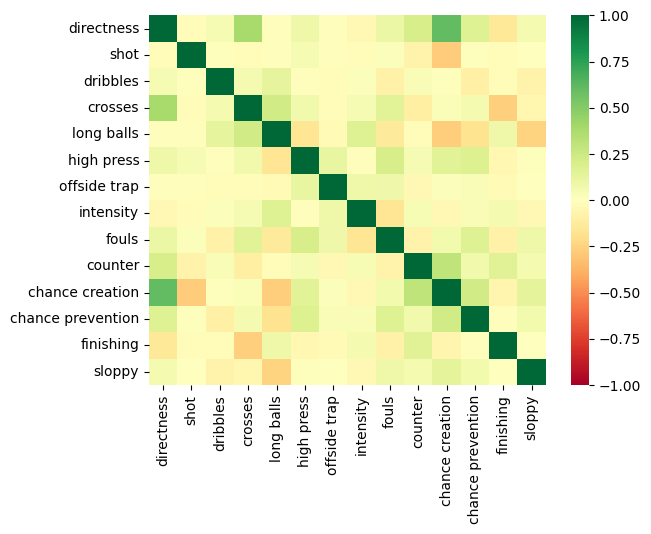

In [19]:
sns.heatmap(df_z.iloc[:,7:].corr(), cmap="RdYlGn", vmin=-1, vmax=1)

In [20]:
df_z.iloc[:,7:].corr()

,directness,shot,dribbles,crosses,long balls,high press,offside trap,intensity,fouls,counter,chance creation,chance prevention,finishing,sloppy
directness,1.000000,-0.024237,0.048380,0.389466,-0.012312,0.090703,-0.015587,-0.040993,0.095299,0.208709,0.607235,0.167928,-0.145200,0.055947
shot,-0.024237,1.000000,0.014612,-0.022106,-0.013689,0.049810,-0.012960,-0.016184,0.017483,-0.070642,-0.276579,0.008694,-0.022857,0.006551
dribbles,0.048380,0.014612,1.000000,0.055147,0.127211,-0.012352,-0.025298,0.016853,-0.089708,0.037310,0.011491,-0.093823,-0.022515,-0.080504
crosses,0.389466,-0.022106,0.055147,1.000000,0.227572,0.071206,-0.028350,0.054345,0.149829,-0.105910,0.027574,0.057900,-0.258464,-0.057726
long balls,-0.012312,-0.013689,0.127211,0.227572,1.000000,-0.163162,-0.031854,0.170027,-0.139870,-0.019567,-0.273214,-0.173784,0.087942,-0.243333
high press,0.090703,0.049810,-0.012352,0.071206,-0.163162,1.000000,0.111872,-0.010998,0.207980,0.048677,0.149842,0.174238,-0.050565,0.013463
offside trap,-0.015587,-0.012960,-0.025298,-0.028350,-0.031854,0.111872,1.000000,0.086515,0.080175,-0.040497,0.023232,0.038699,-0.035352,0.003528
intensity,-0.040993,-0.016184,0.016853,0.054345,0.170027,-0.010998,0.086515,1.000000,-0.163556,0.045404,-0.044985,0.031800,0.055270,-0.039146
fouls,0.095299,0.017483,-0.089708,0.149829,-0.139870,0.207980,0.080175,-0.163556,1.000000,-0.071911,0.065032,0.167874,-0.090166,0.089856
counter,0.208709,-0.070642,0.037310,-0.105910,-0.019567,0.048677,-0.040497,0.045404,-0.071911,1.000000,0.300756,0.074906,0.161232,0.056480


## Viz

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from matplotlib import font_manager
from matplotlib import rcParams
from matplotlib.ticker import FuncFormatter

import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.colors as mcolors
from matplotlib import cm
# from highlight_text import fig_text

from PIL import Image
import urllib
import os
import math


pd.set_option('display.max_columns', 500)

In [22]:
weights = ['Black', 'Bold', 'Medium', 'Regular']

for w in weights:
  font_filename = 'Montserrat-{}.ttf'.format(w)
  font_manager.fontManager.addfont(font_filename)

for w in weights:
  font_filename = 'Poppins-{}.ttf'.format(w)
  font_manager.fontManager.addfont(font_filename)

rcParams['font.family'] = 'Montserrat'
rcParams['font.weight'] = 'medium'

# my_colors = {'-2':'#d43d51','-1':'#f59b56','0':'#fff18f','1':'#89bf77','2':'#00876c'}

# fig, axs = plt.subplots(1, 5, figsize = (5,1), dpi=150)

# for ax, color in zip(axs, my_colors.values()):
#   ax.patch.set_facecolor(color)
#   ax.set_xticks([])
#   ax.set_yticks([])
#   # ax.set_xticklabels([])
#   # ax.set_yticklabels([])
#   # ax.axis('off')
# plt.show()

In [23]:
low_high = {'directness':{'low':'Patient','high':'Direct'},
            'shot':{'low':'Close-range shots','high':'Long-range shots'},
            'dribbles':{'low':'Less dribbles','high':'More dribbles'},
            'crosses':{'low':'Less crosses','high':'More crosses'},
            'long balls':{'low':'Short passes','high':'Long passes'},
            'high press':{'low':'Forwards press less','high':'Forwards press more'},
            'offside trap':{'low':'Less offside traps','high':'More offside traps'},
            'intensity':{'low':'Passive defending','high':'Active defending'},
            'fouls':{'low':'More disciplined','high':'Often commit fouls'},
            'counter':{'low':'Less counter-attacks','high':'More counter-attacks'},
            'chance creation':{'low':'Create less chances','high':'Create more chances'},
            'finishing':{'low':'Bad finishing','high':'Good finishing'},
            'chance prevention':{'low':'Concede more chances','high':'Concede less chances'},
            'sloppy':{'low':'Often lose possession','high':'Rarely lose possession'},
            }

In [24]:
def add_logo_on_ax(ax, team_id, bw = True):
    '''
    This function adds the logo of a football team on a specific
    axes based on the Fotmob team ID.
    Args:
        - ax (object): the matplotlib axes object.
        - team_id (int): the Fotmob team ID.
        - bw (bool): whether to add the logo as black & white or with color.
    '''
    # fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    sofascore_url = 'https://api.sofascore.app/api/v1/team/{}/image'
    club_icon = Image.open(urllib.request.urlopen(sofascore_url.format(team_id)))
    if bw:
        club_icon = club_icon.convert('LA')
    ax.imshow(club_icon)
    ax.axis("off")
    return ax

In [25]:
def visualize_style(teamId, season, ax):
  jarak = 2/3
  df_viz = df_z.loc[(df_z['teamId']==teamId) & (df_z['season']==season)]
  league = df_viz['league'].iloc[0]

  ncols = 6
  nrows = 6

  ax.set_xlim(0, ncols + 1)
  ax.set_ylim(0, nrows + 1)

  # -- Transformation functions
  DC_to_FC = ax.transData.transform
  FC_to_NFC = fig.transFigure.inverted().transform
  # -- Take data coordinates and transform them to normalized figure coordinates
  DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
  # -- Add nation axes
  ax_point_1 = DC_to_NFC([3.25-0.1-3, 6.25-0.1-0.0])
  ax_point_2 = DC_to_NFC([3.75+0.1-3, 6.75+0.1-0.0])
  ax_width = abs(ax_point_1[0] - ax_point_2[0])
  ax_height = abs(ax_point_1[1] - ax_point_2[1])

  ax_coords = DC_to_NFC([3.25-0.1-3, 6.25-0.1-0.0])

  logo_ax = fig.add_axes(
      [ax_coords[0], ax_coords[1], ax_width, ax_height]
  )
  add_logo_on_ax(logo_ax, teamId)

  for i, col in enumerate(style_cols):
    if i<=4:
      start_point = 3
      i_y = i
      # text_x = 3.5/2
    else:
      start_point = -0.5
      i_y = i-5
      # text_x = 3.5/2+3.5
    ax_point_1 = DC_to_NFC([0.25, 6.25])
    ax_point_2 = DC_to_NFC([3.25, 6.75])
    ax_width = abs(ax_point_1[0] - ax_point_2[0])
    ax_height = abs(ax_point_1[1] - ax_point_2[1])
    chart_ax_coords = DC_to_NFC([3.25-start_point, 6.25-i_y*jarak-1.1])
    chart_ax = fig.add_axes(
        [chart_ax_coords[0], chart_ax_coords[1], ax_width, ax_height]
    )
    chart_ax.plot([-3,3],[0,0], alpha=0.2, color='gray')
    chart_ax.scatter(df_viz[col],[0]*df_viz.shape[0], alpha=0.5, color='lightgray')
    chart_ax.scatter(df_viz[col].mean(),[0], alpha=0.5, color='black')

    chart_ax.annotate(xy=(df_viz[col].mean(),0.03), color='gray', ha='center',
                      text="{:.1f}".format((df_viz[col].mean()+3)/6*10),
                      font='Poppins', fontsize=10)

    ax.annotate(
              xy=(3.25-start_point, 6.25-i_y*jarak-1.1),
              text=low_high[col]['low'],
              ha='left',
              va='bottom',
              color='gray',
              fontsize = 7
          )

    ax.annotate(
              xy=(3.25-start_point+3, 6.25-i_y*jarak-1.1),
              text=low_high[col]['high'],
              ha='right',
              va='bottom',
              color='gray',
              fontsize = 7
          )
    chart_ax.set_xlim(-3, 3)
    chart_ax.set_axis_off()

  team_name = df_viz['teamLongName'].iloc[0]
  if len(df_viz['teamLongName'].iloc[0])>20:
    team_name = df_viz['teamName'].iloc[0]
  ax.annotate(
              xy=(1.1, 6.15+0.25),
              text=team_name,
              ha='left',
              va='bottom',
              font='Poppins',
              weight='bold',
              fontsize = 22
          )

  ax.annotate(
              xy=(1.1, 6.15+0.25),
              text='{} {}'.format(league, season),
              ha='left',
              va='top',
              fontsize = 12,
              color='gray'
          )
  # ax.plot([0.0,2.75],[5.9,5.9], color='lightgray')
  # ax.plot([4.25,7],[5.9,5.9], color='lightgray')
  ax.plot([0,7],[5.85,5.85], color='black')

  ax.annotate(
              xy=(3.5, 5.85),
              text='STYLE',
              ha='center',
              va='center',
              fontsize = 14,
              color='white',
              weight='medium',
              font='Poppins',
              bbox=dict(facecolor='black',
                        edgecolor='none')
          )

  ax.plot([0,7],[6.25-3*jarak-1.1-1.15,6.25-3*jarak-1.1-1.15], color='black')
  text_performance = ax.annotate(
              xy=(3.5, 6.25-3*jarak-1.1-1.15),
              text='PERFORMANCE',
              ha='center',
              va='center',
              fontsize = 14,
              color='white',
              weight='medium',
              font='Poppins',
              bbox=dict(facecolor='black',
                        edgecolor='none')
          )

  # print(text_performance.xy)

  for i, col in enumerate(perf_cols):
    if i<=1:
      start_point = 3
      i_y = i
      text_x = 3.5/2
    else:
      start_point = -0.5
      i_y = i-2
      text_x = 3.5/2+3.5
    ax_point_1 = DC_to_NFC([0.25, 6.25])
    ax_point_2 = DC_to_NFC([3.25, 6.75])
    ax_width = abs(ax_point_1[0] - ax_point_2[0])
    ax_height = abs(ax_point_1[1] - ax_point_2[1])
    chart_ax_coords = DC_to_NFC([3.25-start_point, text_performance.xy[1]-0.7-i_y*jarak])
    chart_ax = fig.add_axes(
        [chart_ax_coords[0], chart_ax_coords[1], ax_width, ax_height]
    )
    chart_ax.plot([-3,3],[0,0], alpha=0.2, color='gray')
    chart_ax.scatter(df_viz[col],[0]*df_viz.shape[0], alpha=0.5, color='lightgray')
    chart_ax.scatter(df_viz[col].mean(),[0], alpha=0.5, color='black')

    chart_ax.annotate(xy=(df_viz[col].mean(),0.03), color='gray', ha='center',
                      text="{:.1f}".format((df_viz[col].mean()+3)/6*10),
                      font='Poppins', fontsize=10)

    ax.annotate(
              xy=(3.25-start_point, text_performance.xy[1]-0.7-i_y*jarak),
              text=low_high[col]['low'],
              ha='left',
              va='bottom',
              color='gray',
              fontsize = 7
          )

    ax.annotate(
              xy=(3.25-start_point+3, text_performance.xy[1]-0.7-i_y*jarak),
              text=low_high[col]['high'],
              ha='right',
              va='bottom',
              color='gray',
              fontsize = 7
          )
    chart_ax.set_xlim(-3, 3)
    chart_ax.set_axis_off()


  ax.annotate(
              xy=(5.95, 0.125-0.075),
              text="Viz by ",
              ha='right',
              va='bottom',
              color='lightgray',
              fontsize = 8
          )
  ax.annotate(
              xy=(6.8, 0.125-0.075),
              text="Alfian Hakim",
              ha='right',
              va='bottom',
              color='lightgray',
              fontsize = 8, weight='bold'
          )
  ax.annotate(
              xy=(0.2, 0.125-0.075),
              text="Based on {} matches with\nstats from Sofascore.".format(df_viz['matchId'].nunique()),
              ha='left',
              va='bottom',
              color='lightgray',
              fontsize = 7
          )

  ax.set_axis_off()

In [26]:
champion_ids = [17, 1644, 2672, 2714, 2817, ]

In [27]:
df_z.loc[df_z['teamId'].isin(champion_ids)].groupby(['teamId','teamName'],as_index=False)[style_cols].mean()

,teamId,teamName,directness,shot,dribbles,crosses,long balls,high press,offside trap,intensity,fouls,counter
0,17,Man City,-0.057647,-0.211314,-0.761666,-0.592949,-1.182795,-0.233731,0.405946,-0.634714,0.288916,0.177756
1,1644,PSG,-0.226980,-0.221741,0.193676,-1.343569,-1.611404,0.322873,-0.207589,-0.985854,0.034659,0.309061
2,2672,Bayern,0.356668,-0.279893,0.360526,-0.694078,-1.101908,0.368707,0.103420,0.233801,-0.491284,0.733650
3,2714,Napoli,0.154023,-0.239641,-0.262354,-0.570474,-1.040937,0.222636,-0.092331,-0.219763,0.158243,0.225616
4,2817,Barcelona,-0.084946,-0.366630,-0.174811,-0.418978,-0.900896,0.381114,1.362933,-0.189646,0.671207,0.135994


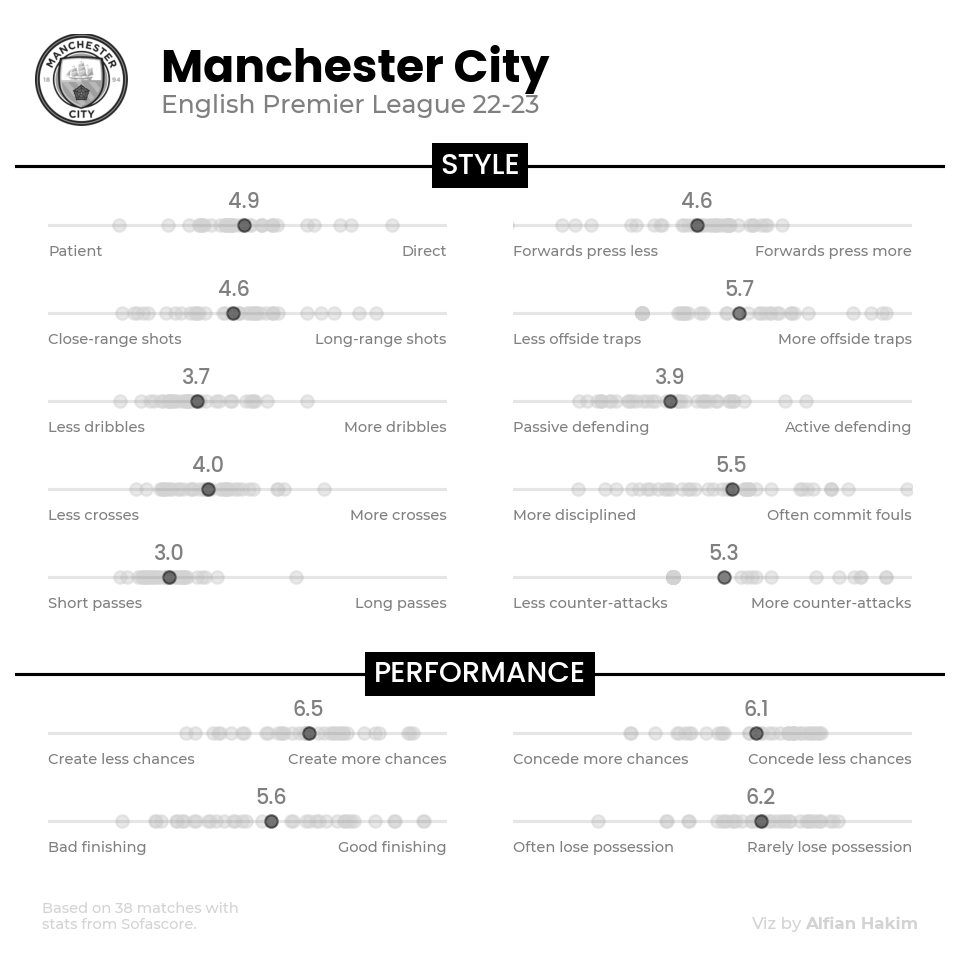

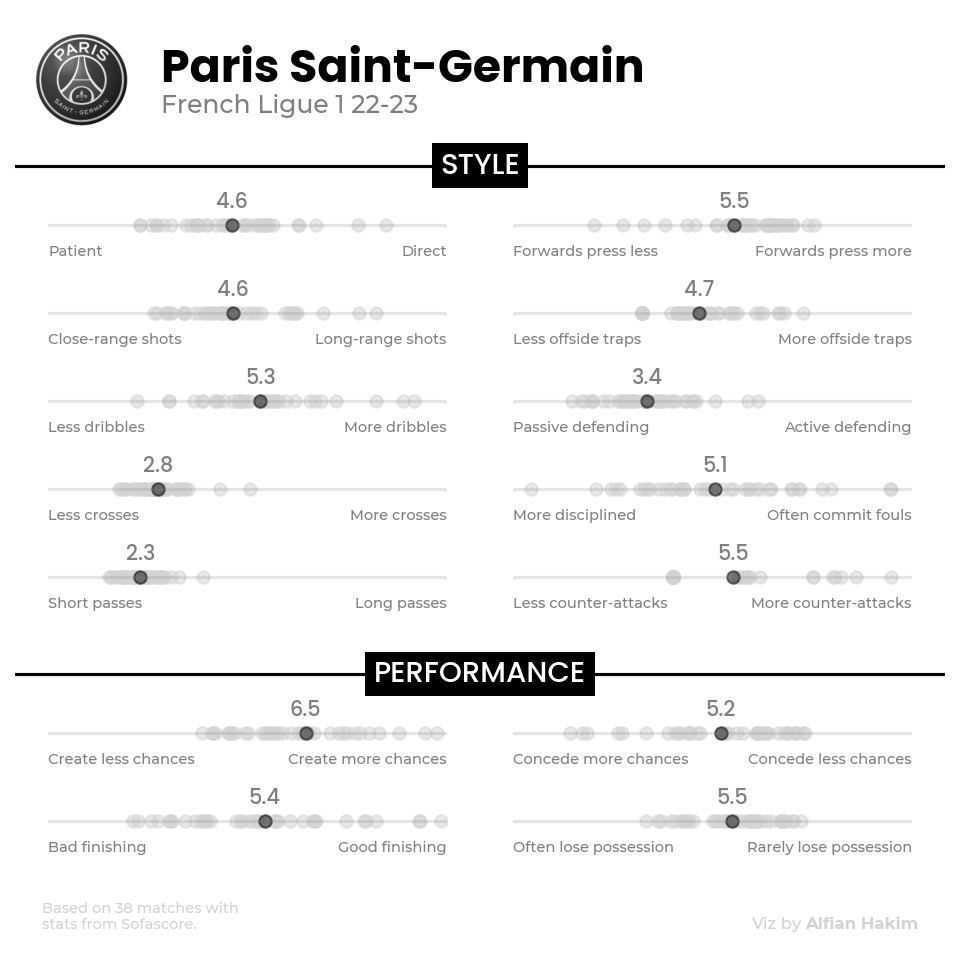

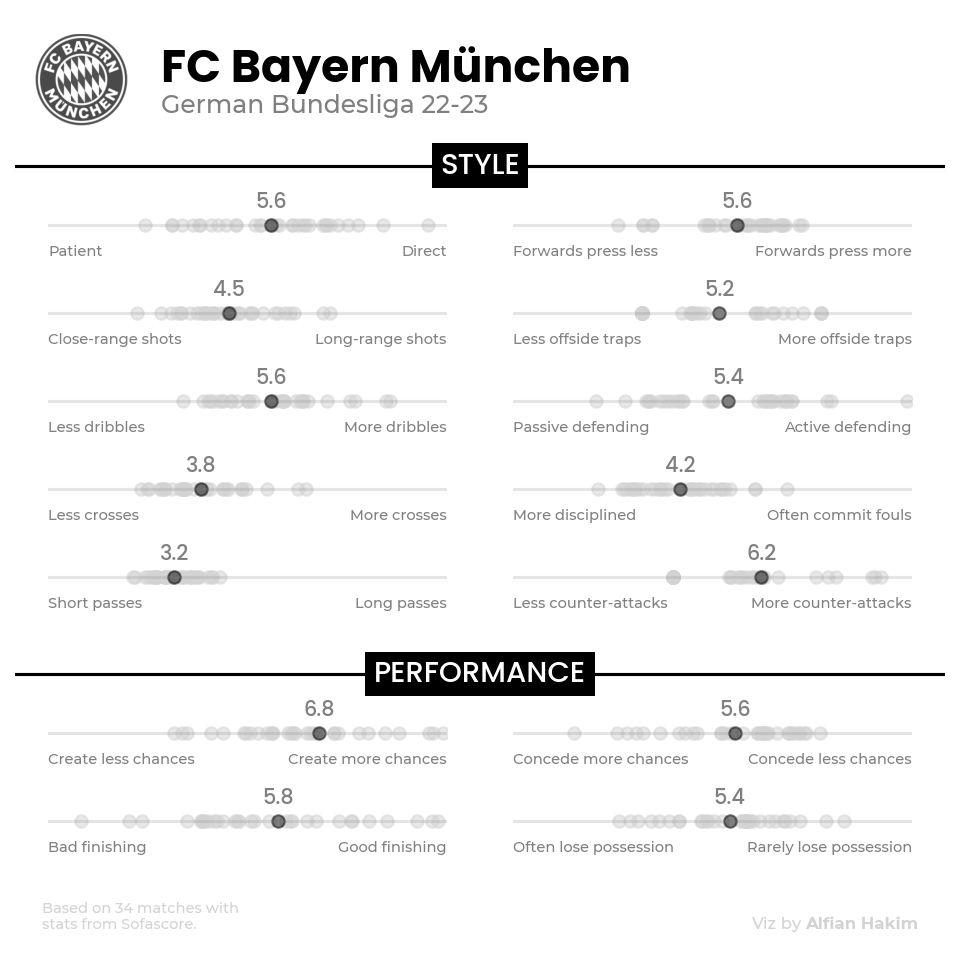

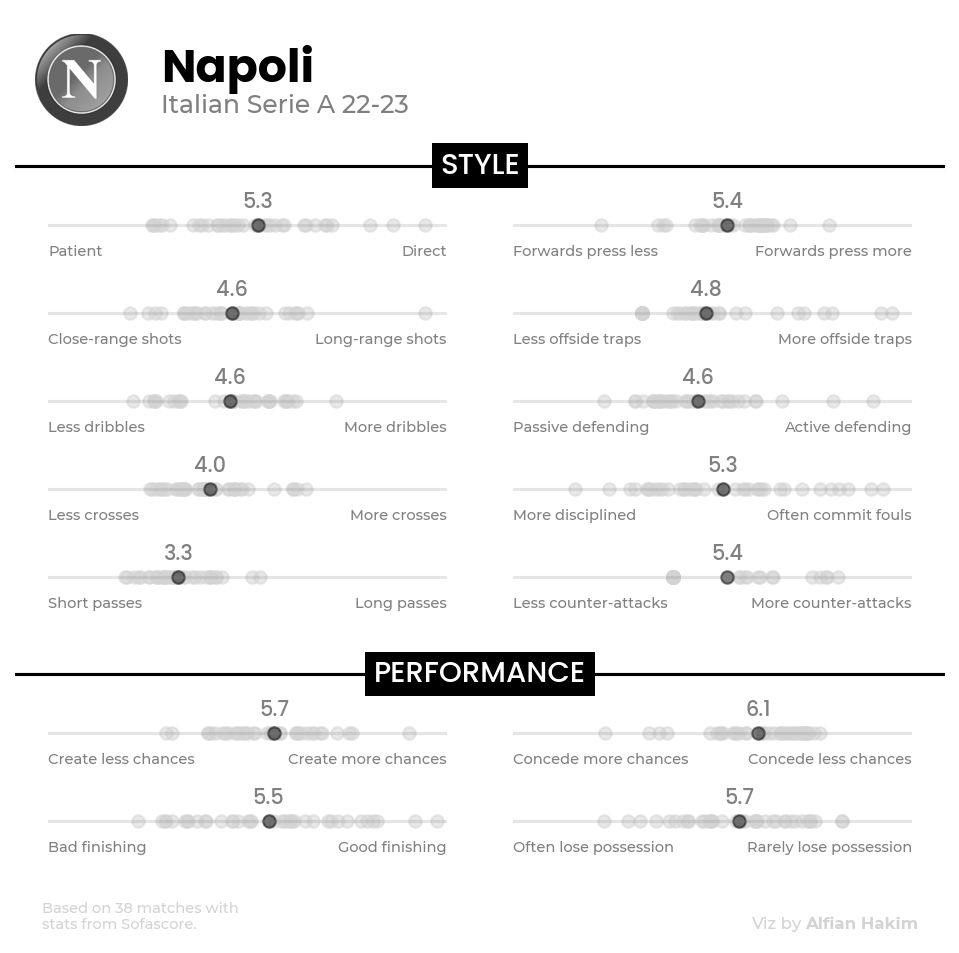

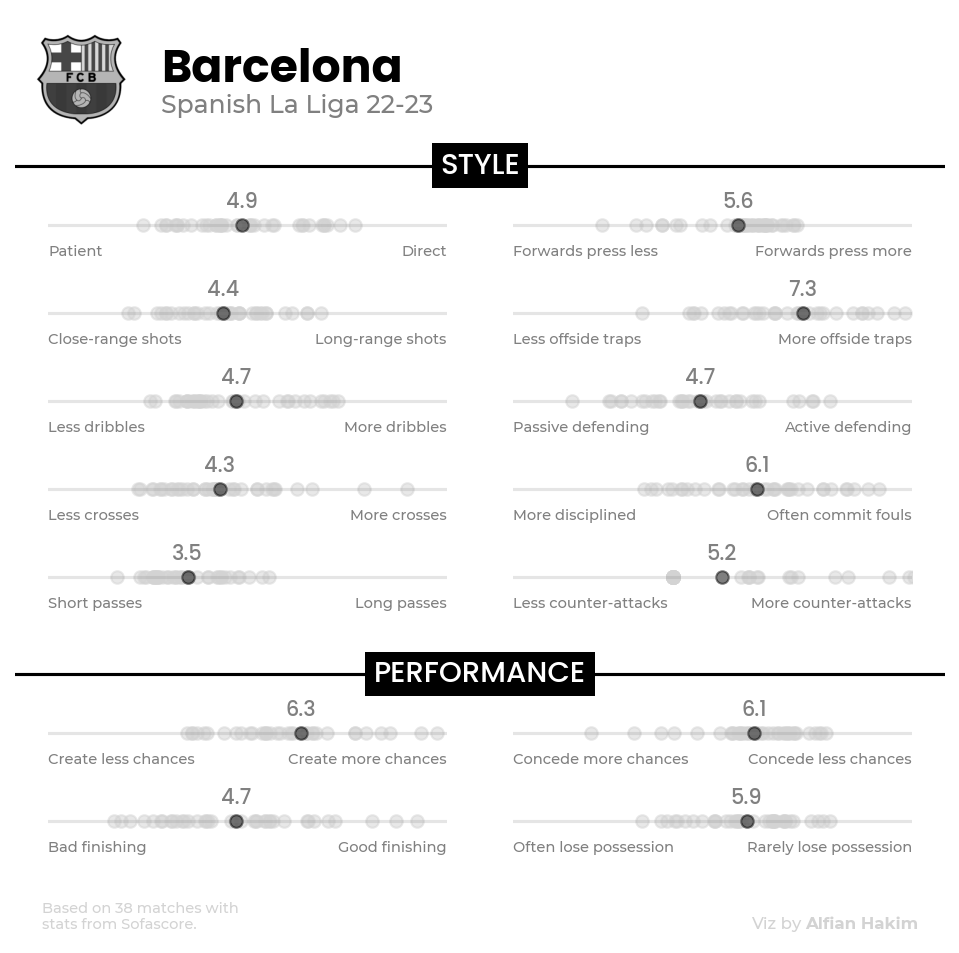

In [28]:
for i, team_id in enumerate(champion_ids):
    fig, ax = plt.subplots(figsize=(8,8), dpi=150)
    visualize_style(team_id, '22-23', ax)
    plt.show()